This is an end to end Sales Department Machine Learning project copied from a udemy course. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
from prophet import Prophet

### Import Sales Data 

In [2]:
sales_df = pd.read_csv('train.csv')

/usr/local/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Import Store Data 

In [7]:
store_df = pd.read_csv('store.csv')

In [8]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [11]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Clean Data 

- Sales DataFrame

<AxesSubplot:>

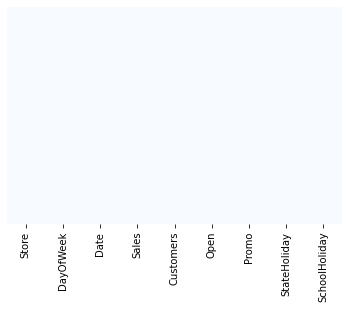

In [12]:
#no nulls
sns.heatmap(sales_df.isnull(), yticklabels=False, cbar = False, cmap = 'Blues')

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

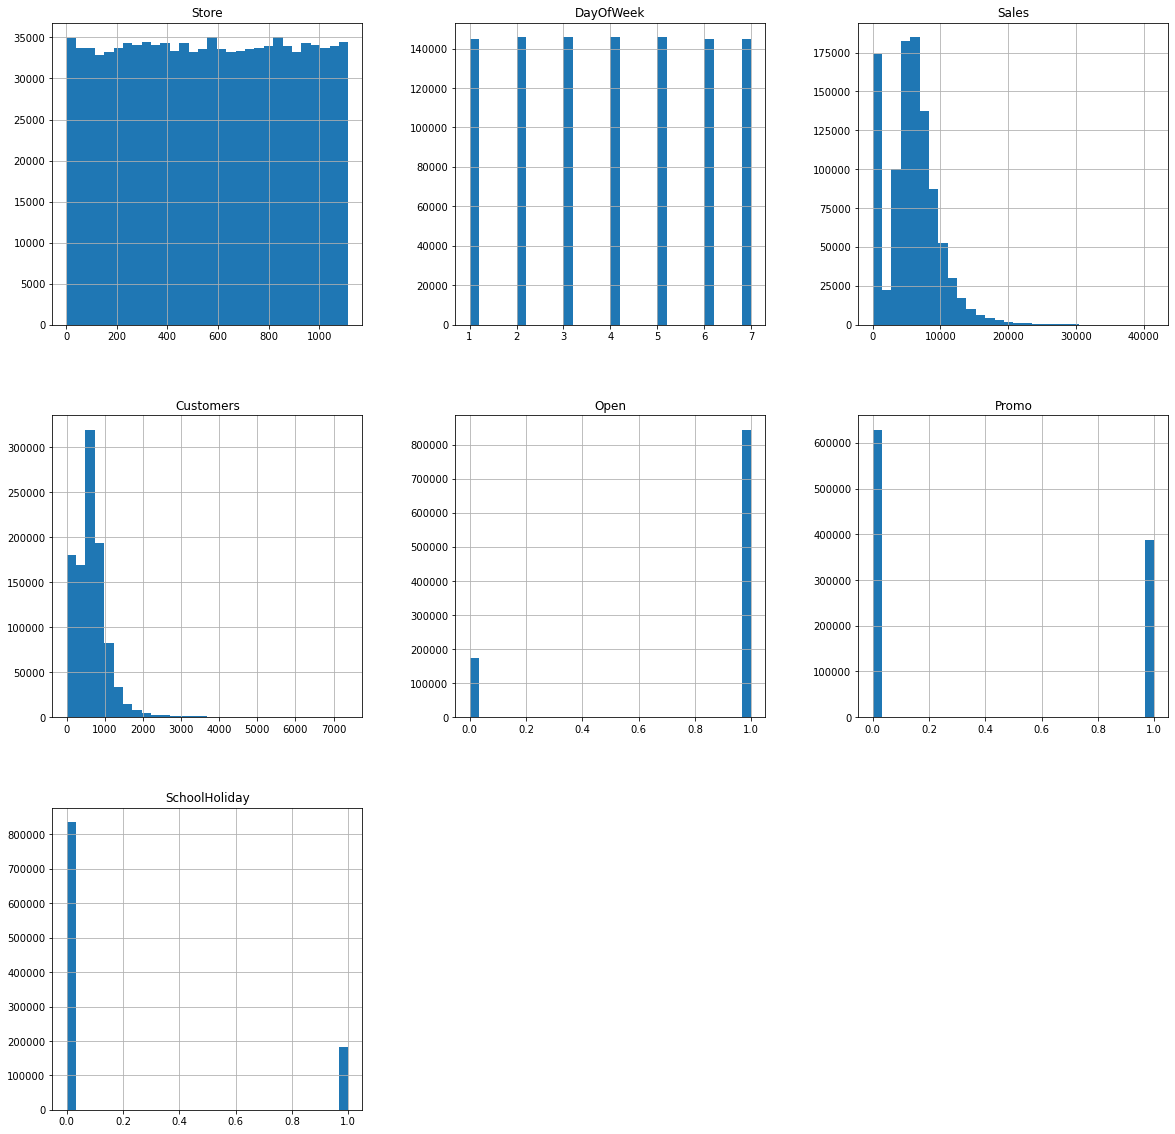

In [13]:
#plot histogram for quick snap shot 
sales_df.hist(bins = 30, figsize= (20, 20))

In [14]:
sales_df['Customers'].max()

7388

In [15]:
closed_store = sales_df[sales_df['Open']==0]
open_store = sales_df[sales_df['Open']==1]

In [16]:
print('Total =', len(sales_df))
print('Number of closed stores =', len(closed_store))
print('Number of open stores =', len(open_store))

Total = 1017209
Number of closed stores = 172817
Number of open stores = 844392


In [17]:
#just want to examine the stores that are open 
sales_df = sales_df[sales_df['Open'] == 1]

In [18]:
sales_df.shape

(844392, 9)

In [19]:
#drop the open column because it has no meaning now 
sales_df.drop(['Open'], axis = 1, inplace = True)

In [20]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


- Store DataFrame

<AxesSubplot:>

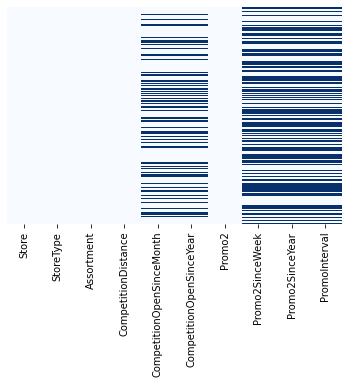

In [21]:
sns.heatmap(store_df.isnull(), yticklabels=False, cbar=False, cmap = 'Blues')

In [22]:
#examine missing values in competition distance 
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [23]:
#competition open since month 
store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
store_df[store_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [25]:
#set null values to zero 
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

In [26]:
for str in str_cols:
    store_df[str].fillna(0, inplace=True)

<AxesSubplot:>

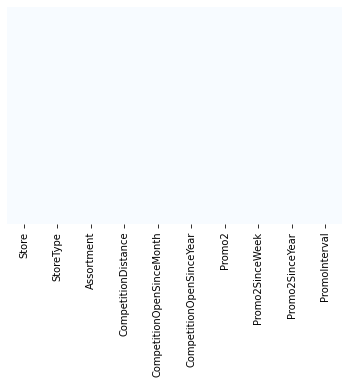

In [27]:
sns.heatmap(store_df.isnull(), yticklabels=False, cbar=False, cmap = 'Blues')

In [28]:
#impute the mean 
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)

In [29]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

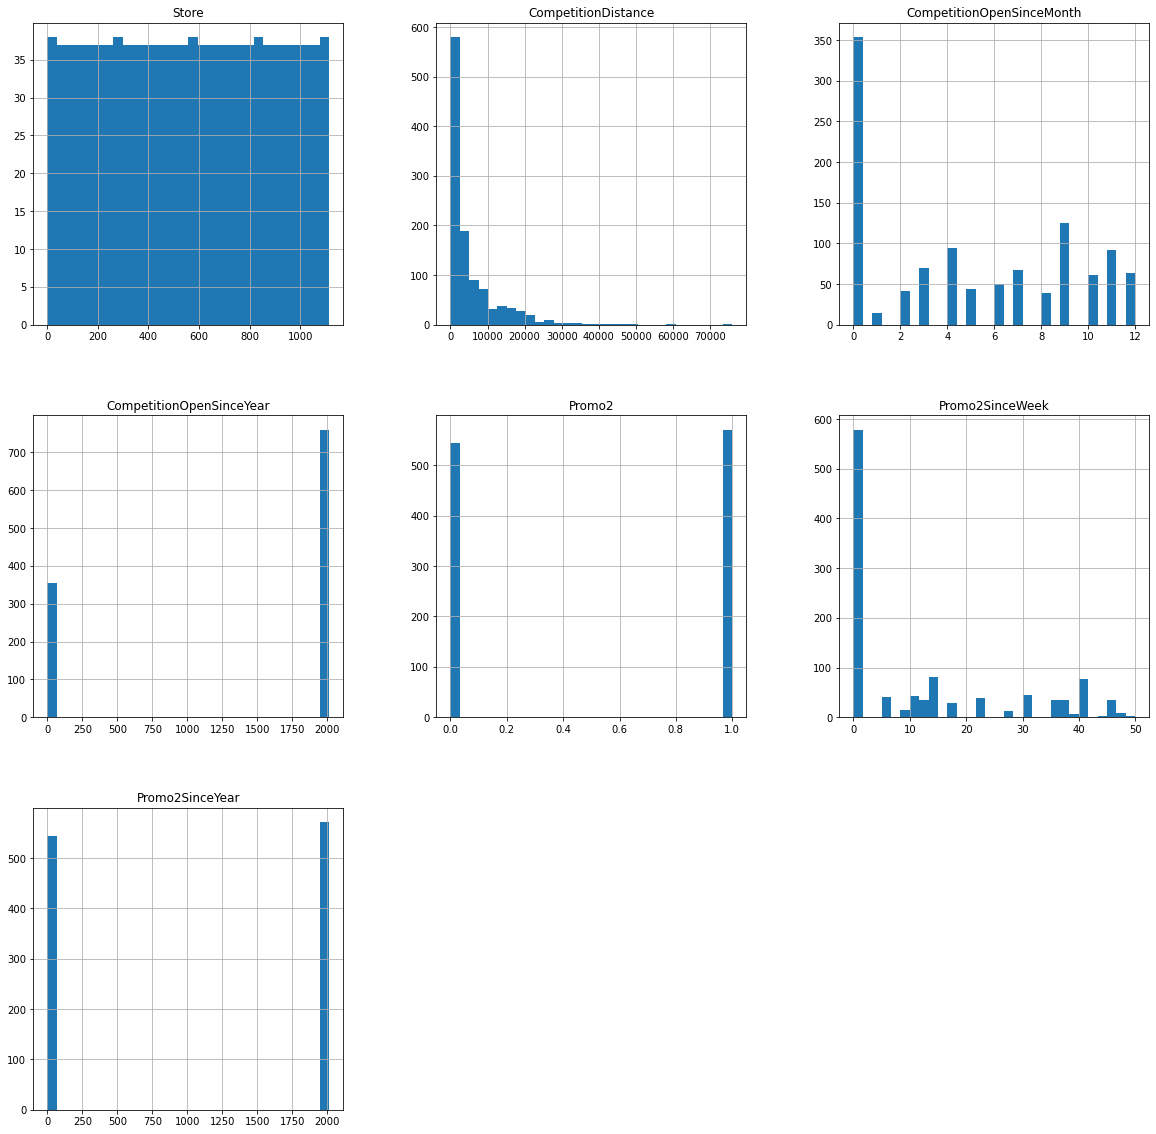

In [30]:
store_df.hist(bins = 30, figsize=(20,20))

### Explore the Dataset

In [31]:
#merge our datasets 
sales_all = pd.merge(sales_df, store_df, how = 'inner', on = 'Store')

In [32]:
sales_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [33]:
correlations = sales_all.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<AxesSubplot:>

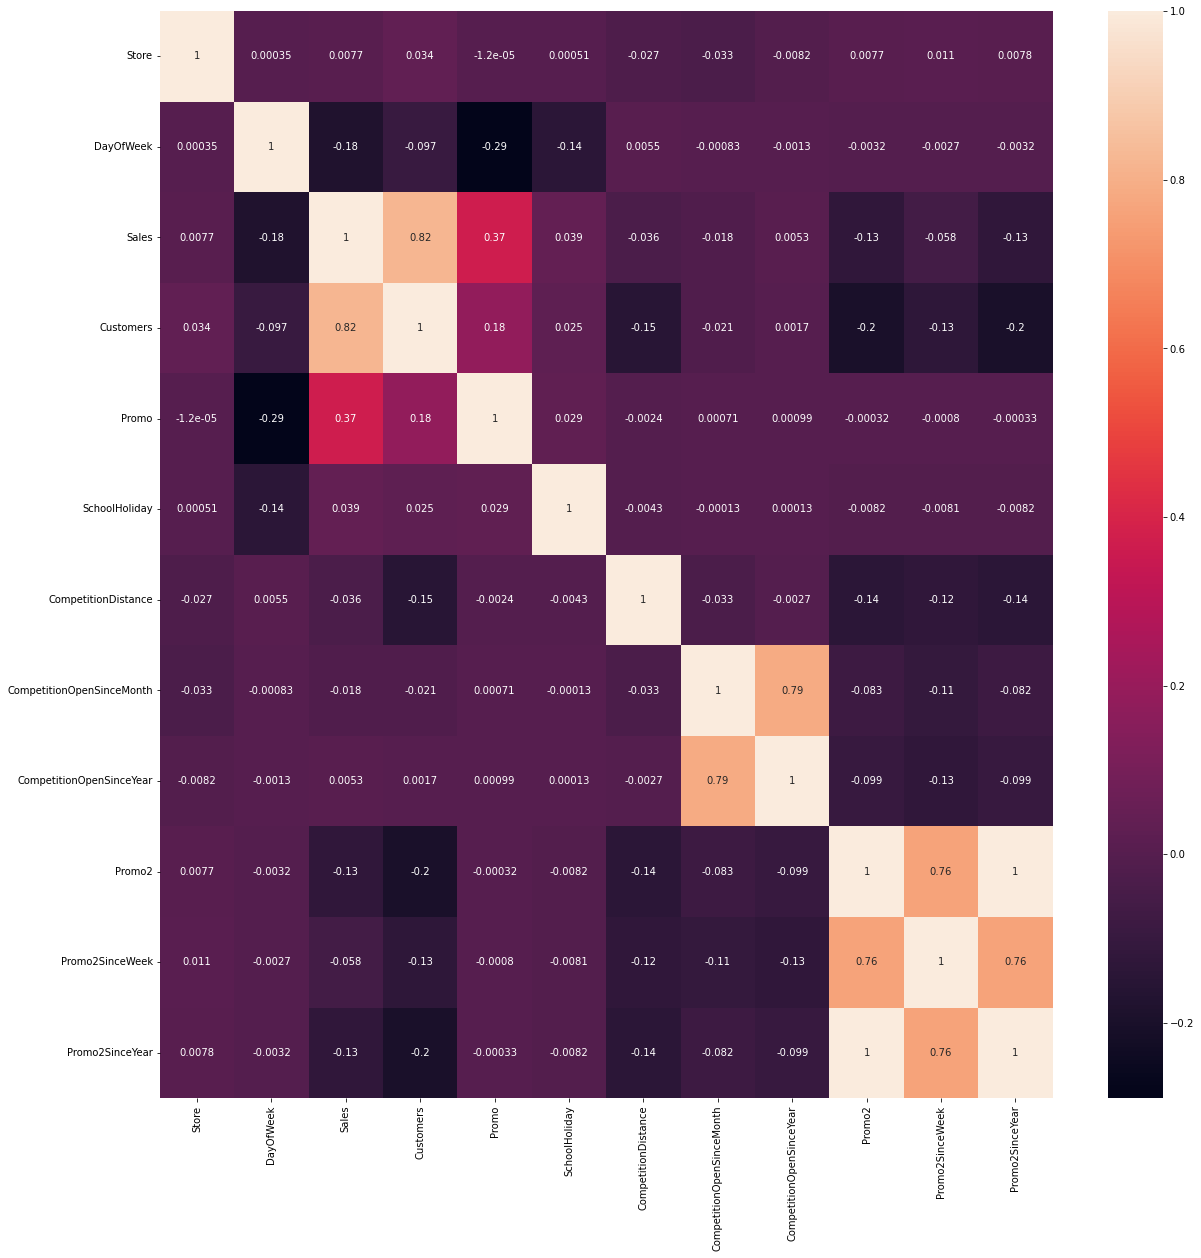

In [34]:
correlations = sales_all.corr()
f, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(correlations, annot = True)

In [35]:
#Let's separate the year and put it into a separate column 
sales_all['Year'] = pd.DatetimeIndex(sales_all['Date']).year

In [36]:
#Let's separate the month and put it into a separate column 
sales_all['Month'] = pd.DatetimeIndex(sales_all['Date']).month

In [37]:
#Let's separate the day and put it into a separate column 
sales_all['Day'] = pd.DatetimeIndex(sales_all['Date']).day

Text(0.5, 1.0, 'Average Customers Per Month')

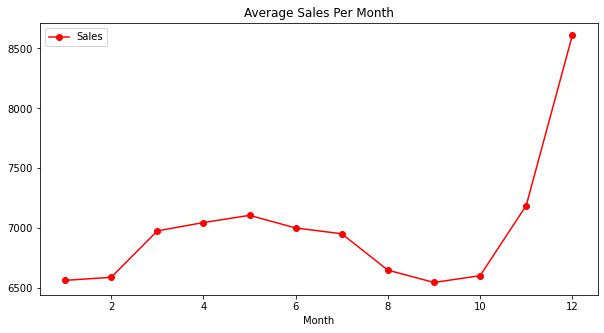

<Figure size 432x288 with 0 Axes>

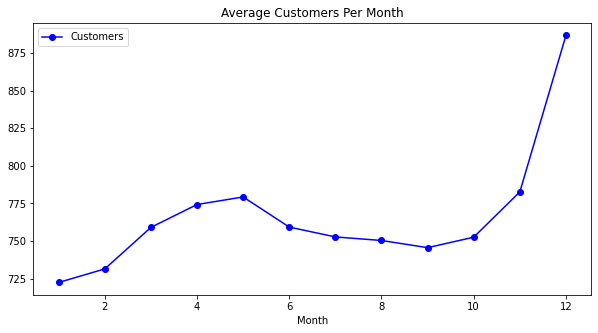

In [38]:
#Let's look at the average sales and number of customers per month 
#groupby works great by grouping all the data that share the same month column 
#it looks like sales and number of customers peak around christmas timeframe 

axis = sales_all.groupby('Month')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure()
axis = sales_all.groupby('Month')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Month')


Text(0.5, 1.0, 'Average Customers Per Day')

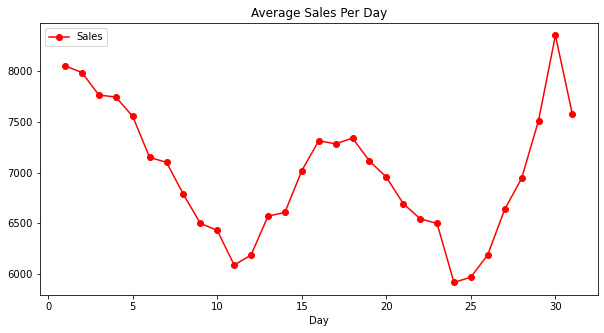

<Figure size 432x288 with 0 Axes>

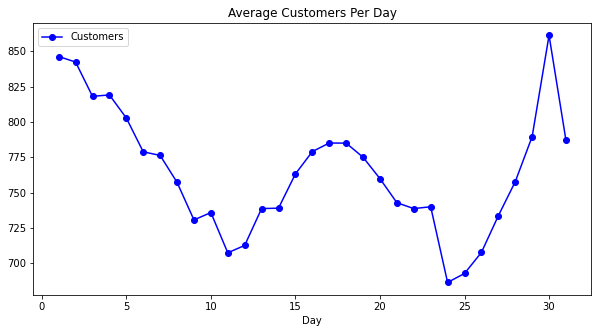

In [39]:
axis = sales_all.groupby('Day')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')

plt.figure()
axis = sales_all.groupby('Day')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Day')


Text(0.5, 1.0, 'Average Customers Per Day of Week')

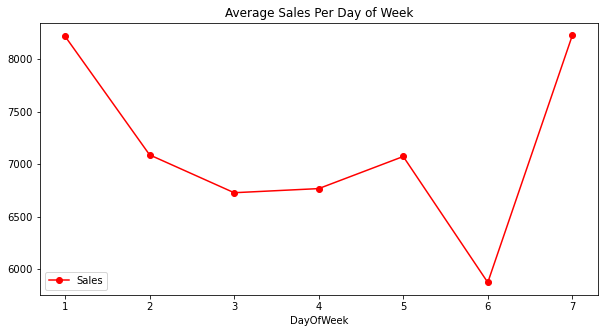

<Figure size 432x288 with 0 Axes>

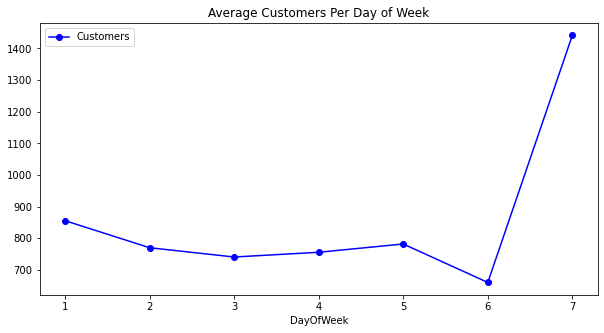

In [40]:
#seven standard for Sunday
axis = sales_all.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of Week')

plt.figure()
axis = sales_all.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Day of Week')


<AxesSubplot:xlabel='Date'>

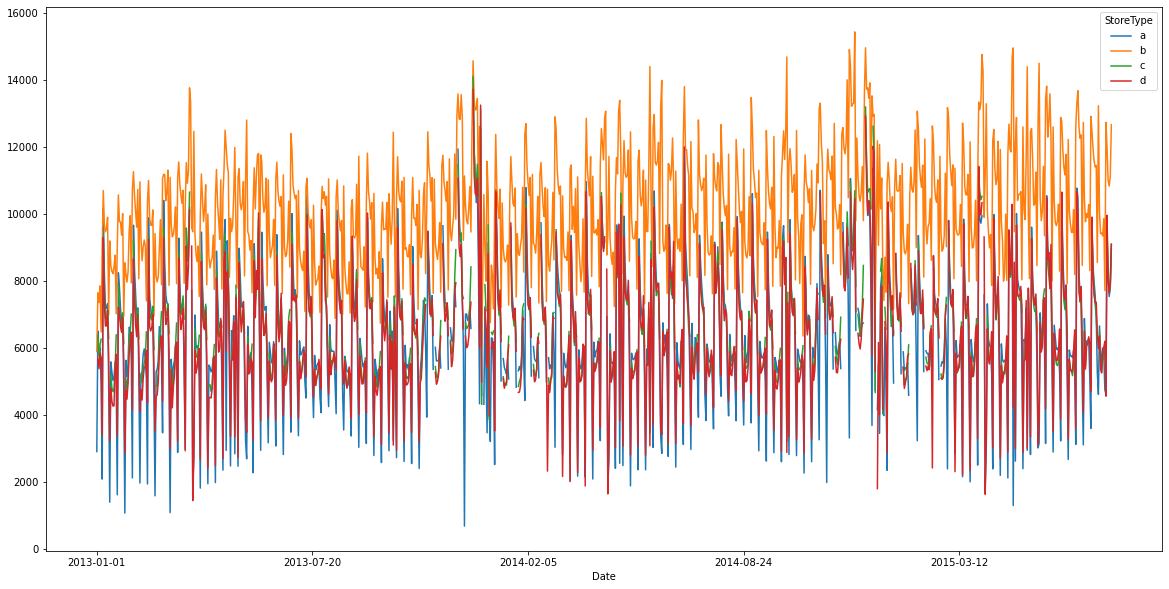

In [41]:
#store b has highest value of sales 
fig, ax = plt.subplots(figsize = (20, 10))

sales_all.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

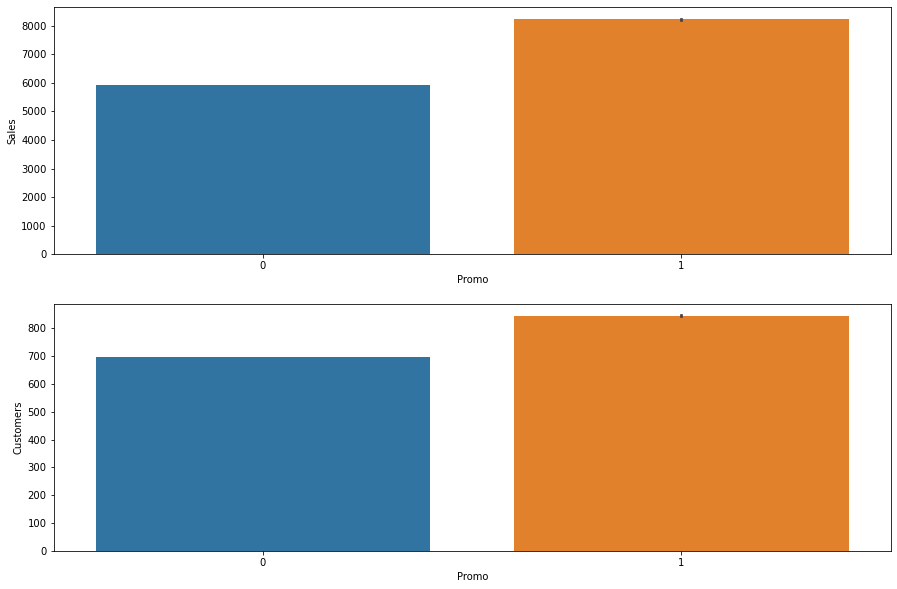

In [42]:
plt.figure(figsize = [15, 10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_all)
plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_all)



<AxesSubplot:xlabel='Promo', ylabel='Customers'>

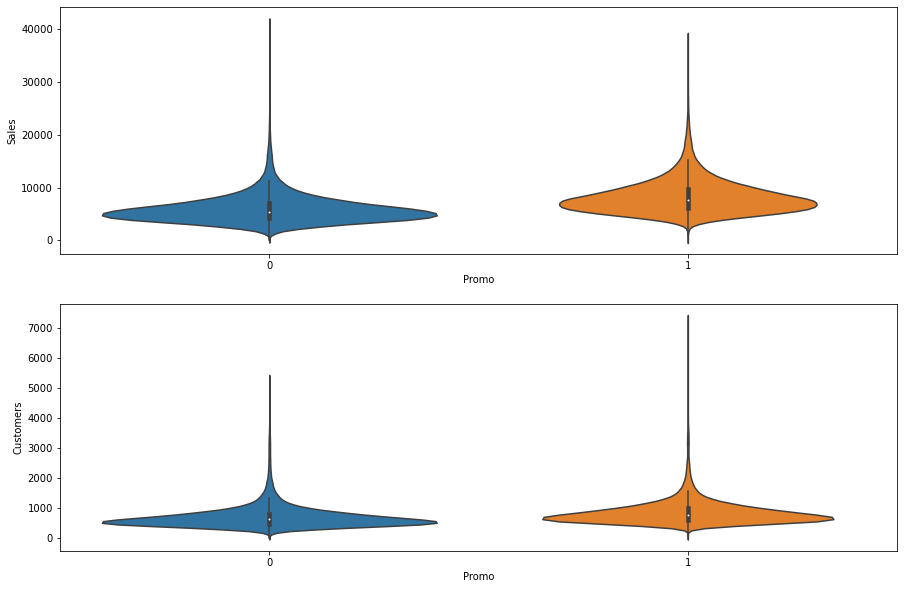

In [43]:
plt.figure(figsize = [15, 10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_all)
plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_all)



# Facebook Prophet, Train the Model 

In [49]:
#rename date ds, and rename sales y 
def sales_predictions(Store_ID, sales_all, periods):
    sales_all = sales_all[sales_all['Store'] == Store_ID]
    sales_all = sales_all[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_all = sales_all.sort_values('ds')
    
    model = Prophet()
    model.fit(sales_all)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)
    


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.16708
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1530.16   0.000159571       97.4651      0.7926      0.7926      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       1530.34    0.00071405       88.5697   8.675e-06       0.001      170  LS failed, Hessian reset 
     191       1530.43   6.09653e-05       99.6277   6.116e-07       0.001      305  LS failed, Hessian reset 
     199       1530.44   2.82355e-05       96.4271           1           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       1530.44   1.73167e-06       96.1224   1.592e-08       0.001      405  LS failed, Hessian reset 
     247       1530.44   4.41638e-08       94.6048       0.332           1      419   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

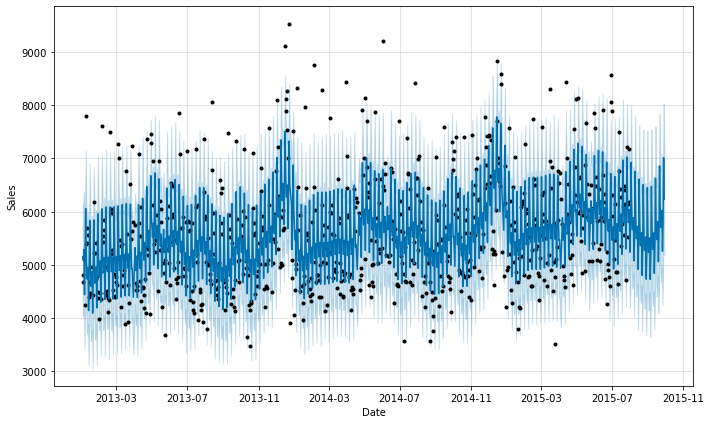

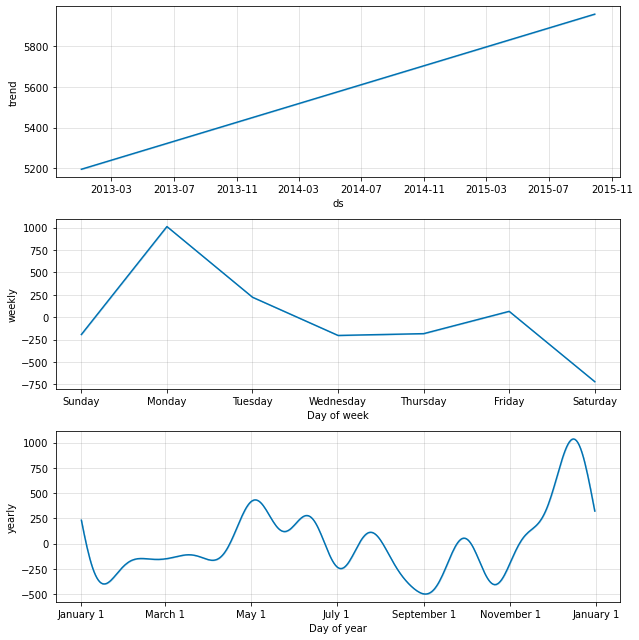

In [50]:
df = sales_predictions(10, sales_all, 60)

# Facebook Prophet, Train the Model Part B

In [57]:
#add holidays
def sales_predictions(Store_ID, sales_all, holidays, periods):
    sales_all = sales_all[sales_all['Store'] == Store_ID]
    sales_all = sales_all[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_all = sales_all.sort_values('ds')
    
    model = Prophet(holidays = holidays)
    model.fit(sales_all)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)
    

In [58]:
#get all the dates related to holidays 
school_holidays = sales_all[sales_all['SchoolHoliday'] == 1].loc[:, 'Date'].values

In [59]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [60]:
school_holidays.shape

(163457,)

In [61]:
state_holidays = sales_all[(sales_all['StateHoliday'] == 'a') | (sales_all['StateHoliday'] == 'b') | (sales_all['StateHoliday'] == 'c')].loc[:, 'Date'].values

In [62]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays), 
                              'holiday': 'state_holiday'})

In [63]:
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [64]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 
                              'holiday': 'school_holiday'})


In [65]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [66]:
#concatenate the two dataframes 
school_state_holidays = pd.concat((state_holidays, school_holidays))

In [67]:
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [69]:
sales_predictions(6, sales_all, school_state_holidays, 90)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.84177
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       1494.64   0.000722565       64.4444   9.932e-06       0.001      159  LS failed, Hessian reset 
      99       1494.68   0.000123348       57.7214           1           1      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1494.81   2.18692e-05       77.1593      0.7859      0.7859      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       1494.96   1.37254e-05       76.4045   2.095e-07       0.001      429  LS failed, Hessian reset 
     299       1494.97   5.21571e-06       65.0138       0.559       0.559      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       1494.99   6.09346e-05       92.0529   1.046e-06       0.001      605  LS failed, Hessian rese

KeyboardInterrupt: 

# Excellent Job 